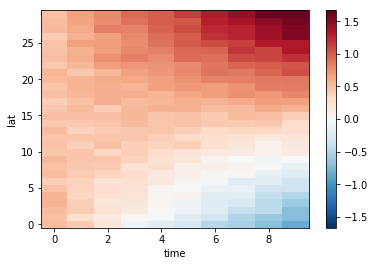

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

da = xr.DataArray(np.random.rand(10,30,40), dims=['time','lat','lon'])
da = da + 0.01 * da.time * (da.lat - 15)
da.mean(dim='lon').T.plot()

In [5]:
# define a function to compute a linear trend of a timeseries
def linear_trend(x):
    pf = np.polyfit(x.time, x, 1)
    # we need to return a dataarray or else xarray's groupby won't be happy
    return xr.DataArray(pf[0])

In [8]:
# apply the function over allpoints to calculate the trend at each point
stacked = da.stack(allpoints=['lat','lon'])  
trend = stacked.groupby('allpoints').apply(linear_trend)
stacked

<xarray.DataArray (time: 10, allpoints: 1200)>
array([[ 0.532694,  0.724019,  0.073961, ...,  0.904033,  0.026557,  0.050677],
       [ 0.710056,  0.107041,  0.544898, ...,  0.364403,  1.136415,  0.672094],
       [ 0.198747,  0.196377, -0.270475, ...,  0.710963,  0.612654,  0.976055],
       ...,
       [-0.355767, -0.204902, -0.135657, ...,  1.611886,  1.600069,  1.064818],
       [-0.853753, -0.969606, -0.944335, ...,  1.636639,  1.649117,  1.350753],
       [-0.876577, -1.178763, -0.661385, ...,  1.501535,  1.525854,  1.974905]])
Coordinates:
  * allpoints  (allpoints) MultiIndex
  - lat        (allpoints) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
  - lon        (allpoints) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
Dimensions without coordinates: time

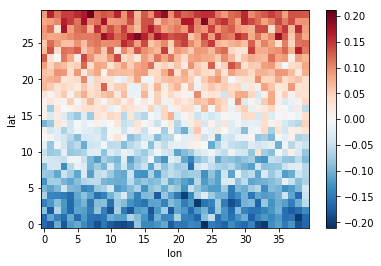

In [7]:
# unstack back to lat lon coordinates
trend_unstacked = trend.unstack('allpoints')
trend_unstacked.plot(cmap='RdBu_r')